In [147]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#oversampling
from imblearn.over_sampling import SMOTE
# to save our train model , that we can reuse it again, and we don,t need to train it again
import joblib
from tkinter import *

In [110]:
credit_card_faurd = pd.read_csv("D:\DataSetfor MLandDL\creditcard.csv")

In [4]:
credit_card_faurd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_faurd.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
credit_card_faurd.shape

(284807, 31)

In [9]:
credit_card_faurd['Class'].unique()

array([0, 1], dtype=int64)

In [12]:
print("Number of rows/datapoints: ", credit_card_faurd.shape[0])
print("Number of columns/features: ", credit_card_faurd.shape[1])

Number of rows/datapoints:  284807
Number of columns/features:  31


In [13]:
credit_card_faurd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
#check Null/NaN values in our dataset
print(credit_card_faurd.isnull().sum())
print(" ")
print(credit_card_faurd.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
 
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [18]:
# as we known that all feature/columns of our dataset is normalized(0 1)
# but Amount columns/feature are not normalized so must normalized or scale this feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
credit_card_faurd['Amount'] = sc.fit_transform(pd.DataFrame(credit_card_faurd['Amount']))

In [19]:
credit_card_faurd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [21]:
# No need of time column/feature soo drop it
credit_card_faurd = credit_card_faurd.drop(['Time'],axis=1)

In [22]:
credit_card_faurd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [23]:
credit_card_faurd.shape

(284807, 30)

In [26]:
credit_card_faurd.duplicated().any()

True

In [28]:
credit_card_faurd = credit_card_faurd.drop_duplicates()

In [29]:
credit_card_faurd.shape

(275663, 30)

# Not handling imbalanced data


In [30]:
credit_card_faurd['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

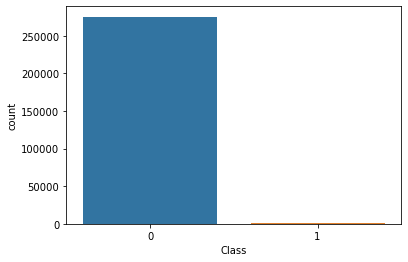

In [32]:
sns.countplot(credit_card_faurd['Class'])

#### Store Feature Matrix in X and Response(Target) in Vectore y

In [33]:
X = credit_card_faurd.drop('Class', axis=1)
Y = credit_card_faurd['Class']

In [37]:
Y.unique()

array([0, 1], dtype=int64)

##### Spliting dataset into train test 

In [39]:
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

###### Handling Imbalanced dataset
##### 1: undersampling,  2: oversampling

###### Undersampling: means the class which have more datapoints will be decrease into low number of class

In [42]:
not_fraud = credit_card_faurd[credit_card_faurd['Class']==0]
fraud = credit_card_faurd[credit_card_faurd['Class']==1]

In [43]:
print(len(not_faurd))
print(len(faurd))

275190
473


In [49]:
normal_sample_not_fraud = not_faurd.sample(n=473)

In [50]:
normal_sample_not_fraud.shape

(473, 30)

In [51]:
new_data = pd.concat([normal_sample_not_fraud, fraud], ignore_index=True)

In [52]:
new_data.shape

(946, 30)

In [55]:
new_data['Class'].shape

(946,)

In [57]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [58]:
X = new_data.drop('Class', axis=1)
Y = new_data['Class']

In [59]:
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [61]:
len(x_test)

190

In [76]:
#define function to reuse it for different model
def classification(model, X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state= 42)
    model.fit(x_train,y_train)
    print("Accuracy: ", model.score(x_test,y_test)*100, "%")
    
    # Cross Validation: it is used for better validation of model
    # e.g: cv 5: train 4 and for test 1
    score = cross_val_score(model, X,Y ,cv=5)
    print("Cross validation score: ", np.mean(score)*100, "%")

# Logistic Regression

In [79]:
model_log = LogisticRegression()
classification(model_log, x_train,y_train)

Accuracy:  95.23809523809523 %
Cross validation score:  93.65109794353434 %


In [80]:
y_test.head()

327    0
30     0
820    1
404    0
76     0
Name: Class, dtype: int64

In [81]:
y_pred = model_log.predict(x_test)

In [82]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [83]:
#find accuracy score
accuracy_score(y_test,y_pred)

0.9421052631578948

In [84]:
precision_score(y_test, y_pred)

0.9789473684210527

In [85]:
recall_score(y_test, y_pred)

0.9117647058823529

In [86]:
f1_score(y_test, y_pred)

0.9441624365482234

###### Decision tree classifier

In [88]:
model_dt = DecisionTreeClassifier()
classification(model_dt, x_train, y_train)

Accuracy:  89.41798941798942 %
Cross validation score:  89.0196932729174 %


In [96]:
y_pred1 = model_dt.predict(x_test)
y_pred1

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [97]:
#find accuracy score
accuracy_score(y_test,y_pred1)

0.9105263157894737

###### RandomForestClassifier

In [90]:
model_rf = RandomForestClassifier()
classification(model_rf, x_train, y_train)

Accuracy:  93.12169312169311 %
Cross validation score:  92.72481700941094 %


In [102]:
y_pred2 = model_rf.predict(x_test)
y_pred2

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [103]:
#find accuracy score
accuracy_score(y_test,y_pred2)

0.9368421052631579

######  Overall Result

In [104]:
Final_result = pd.DataFrame({'Model':['LR', 'DT', 'RF'],
                            "AC":[accuracy_score(y_test, y_pred)*100,
                                  accuracy_score(y_test, y_pred1)*100,
                                  accuracy_score(y_test, y_pred2)*100,
                                 ]})

In [105]:
Final_result

,Model,AC
0,LR,94.210526
1,DT,91.052632
2,RF,93.684211


###### Graphically visualization of Final result

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='AC'>

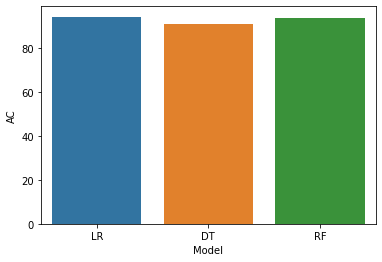

In [106]:
sns.barplot(Final_result['Model'], Final_result['AC'])

###### Oversampling: means the class which have less datapoints will increase upto the number of class which have more datapoints

In [107]:
X = credit_card_faurd.drop('Class', axis=1)
y = credit_card_faurd['Class']

In [108]:
X.shape

(275663, 29)

In [109]:
y.shape

(275663,)

In [113]:
x_res, y_res = SMOTE().fit_resample(X,y)

In [116]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [117]:
x_train, x_test,y_train, y_test = train_test_split(x_res, y_res, test_size=0.20, random_state=42)

###### Logistic Regression

In [118]:
model_log1 = LogisticRegression()
model_log1.fit(x_train, y_train)

LogisticRegression()

In [121]:
y_pred3 = model_log1.predict(x_test)

In [122]:
accuracy_score(y_test, y_pred3)

0.9447200116283295

In [123]:
precision_score(y_test, y_pred3)

0.9730215827338129

In [124]:
recall_score(y_test, y_pred3)

0.914731923713252

In [125]:
f1_score(y_test, y_pred3)

0.9429768252570025

###### Decision Tree

In [126]:
model_dt1 = DecisionTreeClassifier()
model_dt1.fit(x_train, y_train)

DecisionTreeClassifier()

In [127]:
y_pred4 = model_dt1.predict(x_test)

In [128]:
accuracy_score(y_test, y_pred4)

0.9982648352047676

In [129]:
precision_score(y_test, y_pred4)

0.9976575267840929

In [130]:
recall_score(y_test, y_pred4)

0.9988727887569769

In [131]:
f1_score(y_test, y_pred4)

0.9982647879134756

###### Randomforest

In [132]:
model_rf1 = RandomForestClassifier()
model_rf1.fit(x_train, y_train)

RandomForestClassifier()

In [133]:
y_pred5 = model_rf1.predict(x_test)

In [134]:
accuracy_score(y_test, y_pred5)

0.9999273229405138

In [135]:
precision_score(y_test, y_pred5)

0.9998545745396376

In [136]:
recall_score(y_test, y_pred5)

1.0

In [137]:
f1_score(y_test, y_pred5)

0.9999272819822931

In [138]:
final_result = pd.DataFrame({'Model':['LR', 'DT', 'RF'],
                            "AC": [
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                  ]})

In [139]:
final_result

,Model,AC
0,LR,94.472001
1,DT,99.826484
2,RF,99.992732


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='AC'>

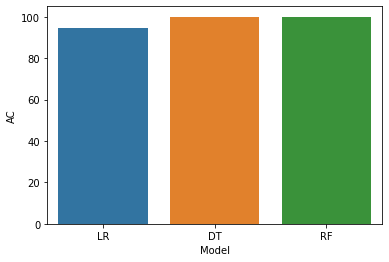

In [140]:
#Graphically visualized the final result
sns.barplot(final_result['Model'], final_result['AC'])

###### Save our train model

In [143]:
joblib.dump(model_rf1, 'credit_card_fraud_model')

['credit_card_fraud_model']

In [144]:
# to reuse this model, simply load this train model
model = joblib.load('credit_card_fraud_model')

In [150]:
pred = model.predict([[1,1,1,1,1,3,14,15,7,8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [151]:
if pred == 0:
    print('Normal Transction')
else:
    print('Fraudlant Transction')

Normal Transction


In [149]:
from tkinter import *
import joblib

def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())

    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())

    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())
    v17=float(e17.get())
    v18=float(e18.get())


    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())
    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())


    model = joblib.load('credit_card_fraud_model.pkl')
    y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]

    result = []
    if y_pred ==0:

        result.append("Normal Transcation")
    else:

        result.append("Fraudulent Transcation")
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")
    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)



master = Tk()
master.title("Credit Card Fraud Detection System")


label = Label(master, text = "Credit Card Fraud Detection System"
                          , bg = "black", fg = "white",width = 30).grid(row=0,columnspan=2)


Label(master, text="Enter value of V1").grid(row=1)
Label(master, text="Enter value of V2").grid(row=2)
Label(master, text="Enter value of V3").grid(row=3)
Label(master, text="Enter value of V4").grid(row=4)
Label(master, text="Enter value of V5").grid(row=5)
Label(master, text="Enter value of V6").grid(row=6)
Label(master, text="Enter value of V7").grid(row=7)
Label(master, text="Enter value of V8").grid(row=8)
Label(master, text="Enter value of V9").grid(row=9)
Label(master, text="Enter value of V10").grid(row=10)
Label(master, text="Enter value of V11").grid(row=11)
Label(master, text="Enter value of V12").grid(row=12)

Label(master, text="Enter value of V13").grid(row=13)
Label(master, text="Enter value of V14").grid(row=14)
Label(master, text="Enter value of V15").grid(row=15)
Label(master, text="Enter value of V16").grid(row=16)
Label(master, text="Enter value of V17").grid(row=17)
Label(master, text="Enter value of V18").grid(row=18)

Label(master, text="Enter value of V19").grid(row=19)
Label(master, text="Enter value of V20").grid(row=20)
Label(master, text="Enter value of V21").grid(row=21)
Label(master, text="Enter value of V22").grid(row=22)
Label(master, text="Enter value of V23").grid(row=23)
Label(master, text="Enter value of V24").grid(row=24)

Label(master, text="Enter value of V25").grid(row=25)
Label(master, text="Enter value of V26").grid(row=26)
Label(master, text="Enter value of V27").grid(row=27)
Label(master, text="Enter value of V28").grid(row=28)
Label(master, text="Enter value of V29").grid(row=29)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)

e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18= Entry(master)
e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23= Entry(master)
e24 = Entry(master)


e25 = Entry(master)
e26= Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29= Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)


e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)
e18.grid(row=18, column=1)


e19.grid(row=19, column=1)
e20.grid(row=20, column=1)
e21.grid(row=21, column=1)
e22.grid(row=22, column=1)
e23.grid(row=23, column=1)
e24.grid(row=24, column=1)

e25.grid(row=25, column=1)
e26.grid(row=26, column=1)
e27.grid(row=27, column=1)
e28.grid(row=28, column=1)
e29.grid(row=29, column=1)
 
Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1, sticky=W, pady=4)

mainloop( )


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_18960\35174285.py", line 40, in show_entry_fields
    model = joblib.load('credit_card_fraud_model.pkl')
  File "C:\Users\HP\anaconda3\lib\site-packages\joblib\numpy_pickle.py", line 579, in load
    warnings.warn("The file '%s' has been generated with a "
FileNotFoundError: [Errno 2] No such file or directory: 'credit_card_fraud_model.pkl'
